# A/B-тестирование

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Пропуски-значений" data-toc-modified-id="Пропуски-значений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Пропуски значений</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Оценка-корректности-проведения-теста" data-toc-modified-id="Оценка-корректности-проведения-теста-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Оценка корректности проведения теста</a></span><ul class="toc-item"><li><span><a href="#Соответствие-данных-требованиям-технического-задания" data-toc-modified-id="Соответствие-данных-требованиям-технического-задания-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Соответствие данных требованиям технического задания</a></span></li><li><span><a href="#Время-проведения-теста" data-toc-modified-id="Время-проведения-теста-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Время проведения теста</a></span></li><li><span><a href="#Аудитория-теста" data-toc-modified-id="Аудитория-теста-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Аудитория теста</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Определение-количества-событий-на-пользователя" data-toc-modified-id="Определение-количества-событий-на-пользователя-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Определение количества событий на пользователя</a></span></li><li><span><a href="#Расчёт-распределения-числа-событий-в-выборках-по-дням" data-toc-modified-id="Расчёт-распределения-числа-событий-в-выборках-по-дням-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Расчёт распределения числа событий в выборках по дням</a></span></li><li><span><a href="#Определение-изменения-конверсии-в-воронке-в-выборках-на-разных-этапах" data-toc-modified-id="Определение-изменения-конверсии-в-воронке-в-выборках-на-разных-этапах-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Определение изменения конверсии в воронке в выборках на разных этапах</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-А/В---теста" data-toc-modified-id="Анализ-А/В---теста-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ А/В - теста</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

**Постановка задачи** 

Наша задача — провести оценку результатов A/B-теста. В нашем распоряжении есть датасет с действиями пользователей, техническое задание и несколько вспомогательных датасетов.


**Ход исследования**

  - Оценим корректность проведения теста
  - Проанализируем результаты теста

Чтобы оценить корректность проведения теста, проверим:

  - пересечение тестовой аудитории с конкурирующим тестом,
  - совпадение теста и маркетинговых событий, другие проблемы временных границ теста.


**Техническое задание:**

- название теста: `recommender_system_test`;
- группы: А — контрольная, B — новая платёжная воронка;
- дата запуска: 2020-12-07;
- дата остановки набора новых пользователей: 2020-12-21;
- дата остановки: 2021-01-04;
- аудитория: 15% новых пользователей из региона EU;
- назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;
- ожидаемое количество участников теста: 6000.
- ожидаемый эффект: за 14 дней с момента регистрации пользователи покажут улучшение каждой метрики не менее, чем на 10%:
    - конверсии в просмотр карточек товаров — событие `product_page`,
    - просмотры корзины — `product_cart`,
    - покупки — `purchase`.
    

Данные мы  получим из файлов `final_ab_events.csv, final_ab_project_marketing_events.csv, final_ab_new_users.csv, final_ab_participants.csv`. 


**Описание данных:**

`ab_project_marketing_events.csv` — календарь маркетинговых событий на 2020 год.

Структура файла:

- `name` — название маркетингового события;
- `regions` — регионы, в которых будет проводиться рекламная кампания;
- `start_dt` — дата начала кампании;
- `finish_dt` — дата завершения кампании.

`final_ab_new_users.csv` — пользователи, зарегистрировавшиеся с 7 по 21 декабря 2020 года.

Структура файла:

- `user_id` — идентификатор пользователя;
- `first_date` — дата регистрации;
- `region` — регион пользователя;
- `device` — устройство, с которого происходила регистрация.

`final_ab_events.csv` — действия новых пользователей в период с 7 декабря 2020 по 4 января 2021 года.

Структура файла:

- `user_id` — идентификатор пользователя;
- `event_dt` — дата и время покупки;
- `event_name` — тип события;
- `details` — дополнительные данные о событии. Например, для покупок, `purchase,` в этом поле хранится стоимость покупки в долларах.

`final_ab_participants.csv` — таблица участников тестов.

Структура файла:

- `user_id` — идентификатор пользователя;
- `ab_test` — название теста;
- `group` — группа пользователя.


О качестве данных ничего не известно. Поэтому перед проведением исследования понадобится обзор данных. 

Мы проверим данные на ошибки и оценим их влияние на исследование. Затем на этапе предобработки мы поищем возможность исправить самые критичные из них.
 
Таким образом, исследование пройдёт в шесть этапов:


 1. Изучение данных;
 2. Предобработка данных;
 3. Оценка корректности проведения теста;
 4. Исследовательский анализ данных;
 5. Анализ A/B-теста;
 6. Выводы.
 

## Изучение данных из файла

Составим первое представление о данных.

Импортируем  библиотеки для последующего анализа.

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import datetime as dt
from plotly import graph_objects as go
import math as mth


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Прочитаем файлы `final_ab_events.csv, final_ab_project_marketing_events.csv, final_ab_new_users.csv, final_ab_participants.csv` и сохраним их в переменных `events, marketing_events, new_users, participants` соответственно.

In [2]:
# чтение файлов с данными
try:
    participants = pd.read_csv(
        'D:\\Аналитик данных\\Яндекс-практикум\\Final project\\AB\\final_ab_participants.csv')
    new_users = pd.read_csv(
        'D:\\Аналитик данных\\Яндекс-практикум\\Final project\\AB\\final_ab_new_users.csv')
    events = pd.read_csv(
        'D:\\Аналитик данных\\Яндекс-практикум\\Final project\\AB\\final_ab_events.csv')
    marketing_events = pd.read_csv(
        'D:\\Аналитик данных\\Яндекс-практикум\\Final project\\AB\\ab_project_marketing_events.csv')
except:
    participants = pd.read_csv(
        'https://code.s3.yandex.net/datasets/final_ab_participants.csv')
    new_users = pd.read_csv(
        'https://code.s3.yandex.net/datasets/final_ab_new_users.csv')
    events = pd.read_csv(
        'https://code.s3.yandex.net/datasets/final_ab_events.csv')
    marketing_events = pd.read_csv(
        'https://code.s3.yandex.net/datasets/ab_project_marketing_events.csv')

Напишем функцию `data_review` и осуществим её последовательное применение к таблицам.

In [3]:
def data_review(df):

    # head()
    print("Получение первых 5 записей из таблицы:")
    display(df.head(5))
    print("Получение последних 5 записей из таблицы:")
    display(df.tail(5))
    print("Получение 5 случайно выбранных записей из таблицы:")
    display(df.sample(5, random_state=0))

    # info()
    print("Получение общей информации о данных в таблице:")
    print()
    df.info()
    print()

    # describe()
    print("Выведем статистику о датасете:")
    print()
    display(df.describe().T)
    display(df.describe(include='object'))

    # пропуски
    print("Количество пропущенных значений:")
    display(df.isna().sum())

    # доля пропущенных значений в % по столбцам
    print("Доля пропущенных значений в процентах по колонкам:")
    for name in df.columns:
        if df[name].isna().sum() > 0:

            print(
                f'{name} - кол-во пропусков: {df[name].isna().sum() / (df[name].isna().sum() + df[name].count()): .2%}')
        else:
            print(f'{name} - нет пропусков')
    print()

    # дубликаты
    duplicates = df.duplicated().sum()
    print(f"Количество дубликатов: {duplicates}")
    print(
        f"Доля дубликатов от общего количества записей: {(duplicates/len(df)):.2%}")
    print()

    # уникальные значения столбца
    for column in df.columns:
        print(f'Уникальные значения столбца {column}')
        print(df[column].unique())
    print()

    # определение кол-ва уникальных записей
    for column in df.columns:
        print(f'Количество уникальных записей столбца {column}')
        print()
        print(df[column].value_counts())

Применим функцию `data_review` к таблице marketing_events с календарем маркетинговых событий на 2020 год.

In [4]:
# применение функции
data_review(marketing_events)

Получение первых 5 записей из таблицы:


name                   regions    start_dt  \
0      Christmas&New Year Promo             EU, N.America  2020-12-25   
1  St. Valentine's Day Giveaway  EU, CIS, APAC, N.America  2020-02-14   
2        St. Patric's Day Promo             EU, N.America  2020-03-17   
3                  Easter Promo  EU, CIS, APAC, N.America  2020-04-12   
4             4th of July Promo                 N.America  2020-07-04   

    finish_dt  
0  2021-01-03  
1  2020-02-16  
2  2020-03-19  
3  2020-04-19  
4  2020-07-11

Получение последних 5 записей из таблицы:


name regions    start_dt   finish_dt
9   Victory Day CIS (May 9th) Event     CIS  2020-05-09  2020-05-11
10        CIS New Year Gift Lottery     CIS  2020-12-30  2021-01-07
11    Dragon Boat Festival Giveaway    APAC  2020-06-25  2020-07-01
12          Single's Day Gift Promo    APAC  2020-11-11  2020-11-12
13            Chinese Moon Festival    APAC  2020-10-01  2020-10-07

Получение 5 случайно выбранных записей из таблицы:


name        regions    start_dt   finish_dt
8   International Women's Day Promo  EU, CIS, APAC  2020-03-08  2020-03-10
6            Chinese New Year Promo           APAC  2020-01-25  2020-02-07
4                 4th of July Promo      N.America  2020-07-04  2020-07-11
11    Dragon Boat Festival Giveaway           APAC  2020-06-25  2020-07-01
2            St. Patric's Day Promo  EU, N.America  2020-03-17  2020-03-19

Получение общей информации о данных в таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes

Выведем статистику о датасете:



count unique                      top freq
name         14     14  Single's Day Gift Promo    1
regions      14      6                     APAC    4
start_dt     14     14               2020-02-14    1
finish_dt    14     14               2020-10-07    1

name regions    start_dt   finish_dt
count                        14      14          14          14
unique                       14       6          14          14
top     Single's Day Gift Promo    APAC  2020-02-14  2020-10-07
freq                          1       4           1           1

Количество пропущенных значений:


name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

Доля пропущенных значений в процентах по колонкам:
name - нет пропусков
regions - нет пропусков
start_dt - нет пропусков
finish_dt - нет пропусков

Количество дубликатов: 0
Доля дубликатов от общего количества записей: 0.00%

Уникальные значения столбца name
['Christmas&New Year Promo' "St. Valentine's Day Giveaway"
 "St. Patric's Day Promo" 'Easter Promo' '4th of July Promo'
 'Black Friday Ads Campaign' 'Chinese New Year Promo'
 'Labor day (May 1st) Ads Campaign' "International Women's Day Promo"
 'Victory Day CIS (May 9th) Event' 'CIS New Year Gift Lottery'
 'Dragon Boat Festival Giveaway' "Single's Day Gift Promo"
 'Chinese Moon Festival']
Уникальные значения столбца regions
['EU, N.America' 'EU, CIS, APAC, N.America' 'N.America' 'APAC'
 'EU, CIS, APAC' 'CIS']
Уникальные значения столбца start_dt
['2020-12-25' '2020-02-14' '2020-03-17' '2020-04-12' '2020-07-04'
 '2020-11-26' '2020-01-25' '2020-05-01' '2020-03-08' '2020-05-09'
 '2020-12-30' '2020-06-25' '2020-11-11' '2020-10-01']
Уни

Итак, мы выяснили, что:

  - имеем дело с 14 маркетинговыми событиями;
  - пропуски отсутствуют;
  - столбцы `start_dt и finish_dt` имеют некорректный тип данных;
  - маркетинговые события проводятся в Европе, Северной Америке, СНГ и Азиатских странах;
  - явные дубликаты отсутствуют.
  

Применим функцию `data_review` к таблице new_users: пользователям, зарегистрированным с 7 по 21 декабря 2020 года.

In [5]:
# применение функции
data_review(new_users)

Получение первых 5 записей из таблицы:


user_id  first_date     region   device
0  D72A72121175D8BE  2020-12-07         EU       PC
1  F1C668619DFE6E65  2020-12-07  N.America  Android
2  2E1BF1D4C37EA01F  2020-12-07         EU       PC
3  50734A22C0C63768  2020-12-07         EU   iPhone
4  E1BDDCE0DAFA2679  2020-12-07  N.America   iPhone

Получение последних 5 записей из таблицы:


user_id  first_date region   device
61728  1DB53B933257165D  2020-12-20     EU  Android
61729  538643EB4527ED03  2020-12-20     EU      Mac
61730  7ADEE837D5D8CBBD  2020-12-20     EU       PC
61731  1C7D23927835213F  2020-12-20     EU   iPhone
61732  8F04273BB2860229  2020-12-20     EU  Android

Получение 5 случайно выбранных записей из таблицы:


user_id  first_date region   device
9145   8C07103A3DCCA5CB  2020-12-14     EU  Android
33709  9A7EB0465E2DC590  2020-12-10    CIS  Android
7768   1D400F27F375EDDC  2020-12-14    CIS       PC
54387  006E3D14743030D4  2020-12-13     EU  Android
10017  9A79AAC8B0EA52AE  2020-12-14     EU      Mac

Получение общей информации о данных в таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB

Выведем статистику о датасете:



count unique               top   freq
user_id     61733  61733  E9F65DE3B9E65C9B      1
first_date  61733     17        2020-12-21   6290
region      61733      4                EU  46270
device      61733      4           Android  27520

user_id  first_date region   device
count              61733       61733  61733    61733
unique             61733          17      4        4
top     E9F65DE3B9E65C9B  2020-12-21     EU  Android
freq                   1        6290  46270    27520

Количество пропущенных значений:


user_id       0
first_date    0
region        0
device        0
dtype: int64

Доля пропущенных значений в процентах по колонкам:
user_id - нет пропусков
first_date - нет пропусков
region - нет пропусков
device - нет пропусков

Количество дубликатов: 0
Доля дубликатов от общего количества записей: 0.00%

Уникальные значения столбца user_id
['D72A72121175D8BE' 'F1C668619DFE6E65' '2E1BF1D4C37EA01F' ...
 '7ADEE837D5D8CBBD' '1C7D23927835213F' '8F04273BB2860229']
Уникальные значения столбца first_date
['2020-12-07' '2020-12-14' '2020-12-21' '2020-12-08' '2020-12-15'
 '2020-12-22' '2020-12-09' '2020-12-16' '2020-12-23' '2020-12-10'
 '2020-12-17' '2020-12-11' '2020-12-18' '2020-12-12' '2020-12-19'
 '2020-12-13' '2020-12-20']
Уникальные значения столбца region
['EU' 'N.America' 'APAC' 'CIS']
Уникальные значения столбца device
['PC' 'Android' 'iPhone' 'Mac']

Количество уникальных записей столбца user_id

E9F65DE3B9E65C9B    1
597A7D81740B2C6C    1
B71D6A27C4BC1CF8    1
0D8EE25E2767DE83    1
168B2EEB68275944    1
                   ..
4511777F006C08EA    1
7054EBE2E5CBFE0

Итак, мы выяснили, что:

  - таблица содержит 61733 строки и 4 столбца;
  - пропуски отсутствуют;
  - столбец `first_date` имеет некорректный тип данных;
  - существуют 4 региона и 4 типа устройств, с который выполнялась регистрация;
  - явные дубликаты отсутствуют;
  - наиболее популярный регион регистрации - Европа;
  - с устройств Android было совершено наибольшее кол-во регистраций.
  

Применим функцию `data_review` к таблице events:  действиям новых пользователей в период с 7 декабря 2020 по 4 января 2021 года.

In [6]:
# применение функции
data_review(events)

Получение первых 5 записей из таблицы:


user_id             event_dt event_name  details
0  E1BDDCE0DAFA2679  2020-12-07 20:22:03   purchase    99.99
1  7B6452F081F49504  2020-12-07 09:22:53   purchase     9.99
2  9CD9F34546DF254C  2020-12-07 12:59:29   purchase     4.99
3  96F27A054B191457  2020-12-07 04:02:40   purchase     4.99
4  1FD7660FDF94CA1F  2020-12-07 10:15:09   purchase     4.99

Получение последних 5 записей из таблицы:


user_id             event_dt event_name  details
440312  245E85F65C358E08  2020-12-30 19:35:55      login      NaN
440313  9385A108F5A0A7A7  2020-12-30 10:54:15      login      NaN
440314  DB650B7559AC6EAC  2020-12-30 10:59:09      login      NaN
440315  F80C9BDDEA02E53C  2020-12-30 09:53:39      login      NaN
440316  7AEC61159B672CC5  2020-12-30 11:36:13      login      NaN

Получение 5 случайно выбранных записей из таблицы:


user_id             event_dt    event_name  details
390825  355E781F2D95012A  2020-12-22 16:15:15         login      NaN
82196   25CDE8C43F052564  2020-12-15 16:12:06  product_cart      NaN
211107  8857321F4D97B089  2020-12-22 15:56:32  product_page      NaN
182271  6F28139FA1E8EF98  2020-12-18 10:11:55  product_page      NaN
380348  CD104B18BF9D39BE  2020-12-21 21:02:39         login      NaN

Получение общей информации о данных в таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB

Выведем статистику о датасете:



count       mean        std   min   25%   50%   75%     max
details  62740.0  23.877631  72.180465  4.99  4.99  4.99  9.99  499.99

user_id             event_dt event_name
count             440317               440317     440317
unique             58703               267268          4
top     A3917F81482141F2  2020-12-14 18:54:55      login
freq                  36                   10     189552

Количество пропущенных значений:


user_id            0
event_dt           0
event_name         0
details       377577
dtype: int64

Доля пропущенных значений в процентах по колонкам:
user_id - нет пропусков
event_dt - нет пропусков
event_name - нет пропусков
details - кол-во пропусков:  85.75%

Количество дубликатов: 0
Доля дубликатов от общего количества записей: 0.00%

Уникальные значения столбца user_id
['E1BDDCE0DAFA2679' '7B6452F081F49504' '9CD9F34546DF254C' ...
 'C9F1399FDCD83F13' '4F32B58E4FF19DC5' '27767D4BECDD260E']
Уникальные значения столбца event_dt
['2020-12-07 20:22:03' '2020-12-07 09:22:53' '2020-12-07 12:59:29' ...
 '2020-12-30 12:21:24' '2020-12-30 10:54:15' '2020-12-30 10:59:09']
Уникальные значения столбца event_name
['purchase' 'product_cart' 'product_page' 'login']
Уникальные значения столбца details
[ 99.99   9.99   4.99 499.99    nan]

Количество уникальных записей столбца user_id

A3917F81482141F2    36
11285A53EC2B2042    32
365C8B51237C61AF    32
3356239C0DC75E2A    32
203773F2A53233A8    32
                    ..
3A93A3EE439C75BE     1
724FA9292C1265FE     1
9540B650175C385E     1
457E299

Итак, мы выяснили, что:

  - таблица содержит 440317 строки и 4 столбца;
  - пропуски в столбце `details` составляют порядка 86%;
  - столбец `event_dt` имеет некорректный тип данных;
  - существуют 4 вида события: `purchase, product_cart, product_page, login`;
  - явные дубликаты отсутствуют;
  - существует 58703 уникальных пользователя;
  - кол-во покупок превышает кол-во попаданий товара в корзину;
  - наиболее популярная покупка составляет 4.99 доллара.

Применим функцию `data_review` к таблице participants: таблице участников тестов.

In [7]:
# применение функции
data_review(participants)

Получение первых 5 записей из таблицы:


user_id group                  ab_test
0  D1ABA3E2887B6A73     A  recommender_system_test
1  A7A3664BD6242119     A  recommender_system_test
2  DABC14FDDFADD29E     A  recommender_system_test
3  04988C5DF189632E     A  recommender_system_test
4  482F14783456D21B     B  recommender_system_test

Получение последних 5 записей из таблицы:


user_id group            ab_test
18263  1D302F8688B91781     B  interface_eu_test
18264  3DE51B726983B657     A  interface_eu_test
18265  F501F79D332BE86C     A  interface_eu_test
18266  63FBE257B05F2245     A  interface_eu_test
18267  79F9ABFB029CF724     B  interface_eu_test

Получение 5 случайно выбранных записей из таблицы:


user_id group                  ab_test
4890   9708BA96BC78EE9F     A  recommender_system_test
9825   6D05D44AB00C84D2     B        interface_eu_test
6727   97248D21983C5DBC     B        interface_eu_test
624    92F843D598252571     A  recommender_system_test
15137  CDB54E138640B8EF     A        interface_eu_test

Получение общей информации о данных в таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB

Выведем статистику о датасете:



count unique                top   freq
user_id  18268  16666   30B5E3E5B3EBC036      2
group    18268      2                  A   9655
ab_test  18268      2  interface_eu_test  11567

user_id  group            ab_test
count              18268  18268              18268
unique             16666      2                  2
top     30B5E3E5B3EBC036      A  interface_eu_test
freq                   2   9655              11567

Количество пропущенных значений:


user_id    0
group      0
ab_test    0
dtype: int64

Доля пропущенных значений в процентах по колонкам:
user_id - нет пропусков
group - нет пропусков
ab_test - нет пропусков

Количество дубликатов: 0
Доля дубликатов от общего количества записей: 0.00%

Уникальные значения столбца user_id
['D1ABA3E2887B6A73' 'A7A3664BD6242119' 'DABC14FDDFADD29E' ...
 'F501F79D332BE86C' '63FBE257B05F2245' '79F9ABFB029CF724']
Уникальные значения столбца group
['A' 'B']
Уникальные значения столбца ab_test
['recommender_system_test' 'interface_eu_test']

Количество уникальных записей столбца user_id

30B5E3E5B3EBC036    2
E14500C7172C0D15    2
C4876A46378BF2E7    2
3A5B11DD76C2CA65    2
507ADD5337970C14    2
                   ..
5E979C1A709AC48C    1
4B5DB813F43DB19A    1
BD19CB104A82C5CC    1
A02CD17238B0430C    1
657D334EF50623E6    1
Name: user_id, Length: 16666, dtype: int64
Количество уникальных записей столбца group

A    9655
B    8613
Name: group, dtype: int64
Количество уникальных записей столбца ab_test

interface_eu_test          11567
recommender

Итак, мы выяснили, что:

  - таблица содержит 18268 строк и 3 столбца;
  - пропуски отсутствуют;
  - существуют 2 вида тестов: `interface_eu_test, recommender_system_test`;
  - явные дубликаты отсутствуют;
  - существует 16666 уникальных пользователя;
  - кол-во пользователей в группе А превышает группу В.

### Вывод

В нашем распоряжении есть датасет с действиями пользователей, техническое задание и несколько вспомогательных датасетов.

Предварительно можно утверждать: данных достаточно для проведения исследования. Часть колонок необходимо преобразовать в другой тип данных,
а также разобраться с пустыми значениями в столбце `details` таблицы `events`.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

Исправим тип данных в столбцах с датами и посмотрим на пропуски в столбце details таблицы events.

### Изменение типов данных

Вещественный тип данных в столбцах заменим на значения datetime. Создадим дополнительный столбец `date` для последующего построения графиков.

In [8]:
# изменение типа данных
marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'])
marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt'])
new_users['first_date'] = pd.to_datetime(new_users['first_date'])
events['event_dt'] = pd.to_datetime(events['event_dt'])
# создание столбца date
events['date'] = pd.to_datetime(events['event_dt'], format='%Y-%m-%d').dt.date

Напишем функцию `df_info`для проверки результата и осуществим её вызов.

In [9]:
# функция вывода общей информации о таблицах
def df_info(lst_table, lst_name):
    for i, table in enumerate(lst_table):
        display(f'Информация о таблице {lst_name[i]}')
        display(table.info())

In [10]:
# объявление переменных
table = [marketing_events, new_users, events, participants]
table_name = ['marketing_events', 'new_users', 'events', 'participants']

In [11]:
# вызов функцию df_info.
df_info(table[:-1], table_name[:-1])

'Информация о таблице marketing_events'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


None

'Информация о таблице new_users'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     61733 non-null  object        
 1   first_date  61733 non-null  datetime64[ns]
 2   region      61733 non-null  object        
 3   device      61733 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.9+ MB


None

'Информация о таблице events'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     440317 non-null  object        
 1   event_dt    440317 non-null  datetime64[ns]
 2   event_name  440317 non-null  object        
 3   details     62740 non-null   float64       
 4   date        440317 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 16.8+ MB


None

Тип данных измененен. Посмотрим на пропущенные значения.

### Пропуски значений

Посмотрим на пропуски в столбце details таблицы events. Для этого достаточно двух методов `pandas`.

In [12]:
# подсчёт пропущенных значений
events['details'].isna().sum()

377577

Скорее всего, данные отсутствуют потому что, не было дополнительной информации о событие. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать.

### Вывод

Вещественный тип данных в столбцах с датами мы  заменили на значения формата datetime для дальнейшей возможности осуществления действий с датами. 
    
Приняли решение оставить пустые значения в столбце details таблицы events без изменений.
    
    
Перейдем к оценке корректности проведения теста.


## Оценка корректности проведения теста

### Соответствие данных требованиям технического задания 

Проверим корректность всех пунктов технического задания.

Посмотрим на пользователей, зарегистрировавшиеся с 7 по 21 декабря 2020 года: таблица `new_users`. Проверим столбец `first_date`.

In [13]:
new_users['first_date'].describe()

count                   61733
unique                     17
top       2020-12-21 00:00:00
freq                     6290
first     2020-12-07 00:00:00
last      2020-12-23 00:00:00
Name: first_date, dtype: object

Таким образом, существуют пользователи, которые зарегистрировались после `2020-12-21`. Осуществим их удаление.

In [14]:
new_users = new_users.query('first_date <= "2020-12-21"')
new_users['first_date'].describe()

count                   56470
unique                     15
top       2020-12-21 00:00:00
freq                     6290
first     2020-12-07 00:00:00
last      2020-12-21 00:00:00
Name: first_date, dtype: object

Удаление выполнено успешно.

Оценим полноту наших данных, построив гистограмму по столбцу `event_dt` датафрейма `events`.

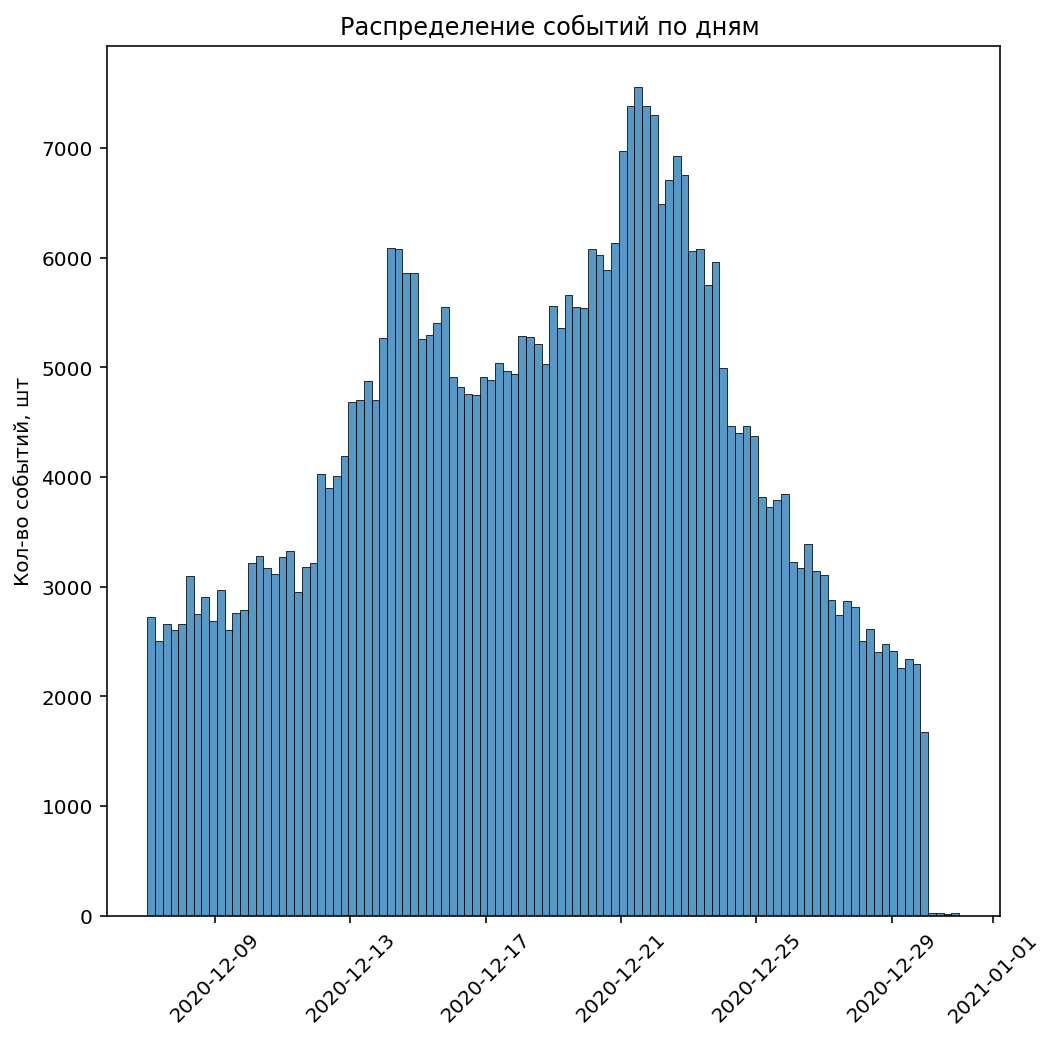

In [15]:
# построение гистограммы
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.histplot(data=events, x='event_dt')
plt.title('Распределение событий по дням ')
plt.xlabel(""), plt.ylabel("Кол-во событий, шт")
plt.xticks(rotation=45)
plt.show()

В данных есть некоторая граница, после которой объем данных уменьшается - это 29/12/2020 года. Все события до этой границы - актуальные. Оставим только их.

In [16]:
events = events.query('event_dt < "2020-12-30"')
events['event_dt'].describe()

count                  440228
unique                 267216
top       2020-12-14 18:54:55
freq                       10
first     2020-12-07 00:00:33
last      2020-12-29 23:59:36
Name: event_dt, dtype: object

Преобразование выполнено успешно.

### Время проведения теста 

Убедимся, что время проведения теста не совпадает с маркетинговыми и другими активностями.

Рассмотрим таблицу `marketing_events` — календарь маркетинговых событий на 2020 год.

In [17]:
# вывод таблицы
marketing_events.sort_values(by='start_dt')

name                   regions   start_dt  \
6             Chinese New Year Promo                      APAC 2020-01-25   
1       St. Valentine's Day Giveaway  EU, CIS, APAC, N.America 2020-02-14   
8    International Women's Day Promo             EU, CIS, APAC 2020-03-08   
2             St. Patric's Day Promo             EU, N.America 2020-03-17   
3                       Easter Promo  EU, CIS, APAC, N.America 2020-04-12   
7   Labor day (May 1st) Ads Campaign             EU, CIS, APAC 2020-05-01   
9    Victory Day CIS (May 9th) Event                       CIS 2020-05-09   
11     Dragon Boat Festival Giveaway                      APAC 2020-06-25   
4                  4th of July Promo                 N.America 2020-07-04   
13             Chinese Moon Festival                      APAC 2020-10-01   
12           Single's Day Gift Promo                      APAC 2020-11-11   
5          Black Friday Ads Campaign  EU, CIS, APAC, N.America 2020-11-26   
0           Christmas&New Year Promo             EU, N.America 2020-12-25   
10         CIS New Year Gift Lottery                       CIS 2020-12-30   

    finish_dt  
6  2020-02-07  
1  2020-02-16  
8  2020-03-10  
2  2020-03-19  
3  2020-04-19  
7  2020-05-03  
9  2020-05-11  
11 2020-07-01  
4  2020-07-11  
13 2020-10-07  
12 2020-11-12  
5  2020-12-01  
0  2021-01-03  
10 2021-01-07

Согласно ТЗ мы должны рассмотреть данные с 7 декабря 2020 по 4 января 2021 года. Найдем пересечения с календарем событий.

In [18]:
report = marketing_events.query(
    'start_dt <= "2021-01-04" and finish_dt >= "2020-12-07"')
report

name        regions   start_dt  finish_dt
0    Christmas&New Year Promo  EU, N.America 2020-12-25 2021-01-03
10  CIS New Year Gift Lottery            CIS 2020-12-30 2021-01-07

Таким образом, имеем пересечения с двумя событиями: рождественская/новогодняя акция в Европе и Северной Америке, а также новогодней лотереей в СНГ.

Данные события могли повлиять на активность пользователей. 


Ввиду того, что мы не знаем всех особенностей рекламных компаний - возможно пользователи не участвовали в них. Сохраним мощность теста, но будем относится к результам эксперимента с осторожностью.

### Аудитория теста 

Удостоверимся, что нет пересечений с конкурирующим тестом и нет пользователей, участвующих в двух группах теста одновременно. Проверим равномерность распределения по тестовым группам и правильность их формирования.

Рассмотрим таблицу `participants`.

In [19]:
participants.sample(5, random_state=0)

user_id group                  ab_test
4890   9708BA96BC78EE9F     A  recommender_system_test
9825   6D05D44AB00C84D2     B        interface_eu_test
6727   97248D21983C5DBC     B        interface_eu_test
624    92F843D598252571     A  recommender_system_test
15137  CDB54E138640B8EF     A        interface_eu_test

Рассчитаем кол-во уникальных пользователей с распределением по группам и типам теста.

In [20]:
report = participants.groupby(['ab_test', 'group']).agg({'user_id': 'nunique'})
report

user_id
ab_test                 group         
interface_eu_test       A         5831
                        B         5736
recommender_system_test A         3824
                        B         2877

Отметим, что распределение по группам неравномерное. Пункт ТЗ: "ожидаемое количество участников теста: 6000" - выполняется.

Определим есть ли пересечения между тестами.

In [21]:
len(participants.groupby('user_id').agg(
    {'ab_test': 'nunique'}).query('ab_test == 2'))

1602

Таким образом 1602 пользователся приняли участие в двух тестах. У нас нет дат проведения теста `interface_eu_test`, если тесты проводились в одно время, то это могло повлиять на результирующие метрики. 

Сохраним мощность теста, но будем относится к результам эксперимента с осторожностью.

Оставим только участников теста `recommender_system_test`.

In [22]:
participants = participants.query('ab_test =="recommender_system_test"')

Посмотрим, есть ли пользователи, которые попали в группу А и В одновременно.

In [23]:
report = participants.groupby('user_id').agg(
    {'group': 'nunique'}).query('group == 2').count()
report

group    0
dtype: int64

Заметим, что у нас нет пользователей, которые попали в две группы одновременно. 

Объединим таблицы и проверим, что после всех преобразований имеем 15% пользователей из Евросоюза.

In [24]:
# объединение таблиц
df = participants.merge(events, on='user_id', how='left').merge(
    new_users, on='user_id', how='left').reset_index(drop=True)
df.head()

user_id group                  ab_test            event_dt  \
0  D1ABA3E2887B6A73     A  recommender_system_test 2020-12-07 14:43:27   
1  D1ABA3E2887B6A73     A  recommender_system_test 2020-12-25 00:04:56   
2  D1ABA3E2887B6A73     A  recommender_system_test 2020-12-07 14:43:29   
3  D1ABA3E2887B6A73     A  recommender_system_test 2020-12-25 00:04:57   
4  D1ABA3E2887B6A73     A  recommender_system_test 2020-12-07 14:43:27   

     event_name  details        date first_date region device  
0      purchase    99.99  2020-12-07 2020-12-07     EU     PC  
1      purchase     4.99  2020-12-25 2020-12-07     EU     PC  
2  product_cart      NaN  2020-12-07 2020-12-07     EU     PC  
3  product_cart      NaN  2020-12-25 2020-12-07     EU     PC  
4  product_page      NaN  2020-12-07 2020-12-07     EU     PC

In [25]:
df.shape

(27720, 10)

In [26]:
# расчет процента пользователей из EU
(df.groupby('region').agg({'user_id': 'nunique'}).loc['EU', 'user_id'])/(
    new_users.query('region == "EU"')['user_id'].nunique()) * 100

15.0

Таким образом, мы действительно имеем 15% пользователей из Евросоюза.

Посмотрим есть ли в наших данных события за пределами 14 дневного периода.
Создадим столбец `date_temp` и оценим данные.



In [27]:
# создание столбца с периодом + 14 дней к моменту регистрации.
df['date_temp'] = df['first_date'] + pd.Timedelta("14 day")
# проверка датафрейма
report = df.query('event_dt > date_temp')
report.shape

(838, 11)


 Таким образом, мы нашли 838 строчек за пределами 14 дневного периода. Осуществим их удаление.


In [28]:
df = df.loc[~df.index.isin(report.index)]
df.shape

(26882, 11)


 Удаление выполнено успешно.


### Вывод



    
    
Итак, мы: 

  - проверили соответствие данных требованиям технического задания;
    
    

  - убрали пользователей, которые зарегистрировались после 21/12/2020;
  
  
  - оставили только актуальные события до 29/12/2020 включительно;
  
  
  - проверили, что аудитория: 15% новых пользователей из региона EU;
  
  
  - оценили, что ожидаемое количество участников теста: более 6000;
  
  
   - определили, что время проведения теста совпадает с двумя маркетинговыми событиями и приняли решение сохранить мощность теста;
    

   - рассчитали, что 1602 пользователся приняли участие в двух тестах: `interface_eu_test и recommender_system_test`, и пришли к выводы, что если тесты проводились в одно время, то это могло повлиять на результирующие метрики;

    

   - выяснили, что  у нас нет пользователей, которые попали в  контрольную и экспериментальную группы одновременно;
    

   - удалили события за пределами 14-дневного периода после регистрации.
    
    

Перейдем к исследовательскому анализу данных. 

## Исследовательский анализ данных

### Определение количества событий на пользователя

Посчитаем среднее кол-во событий на пользователся группы А и группы В.

Создадим датафрейм только с группой А и только с группой В.

In [29]:
group_A = df.query('group == "A"')
group_B = df.query('group == "B"')

Посчитаем среднее кол-во событий на пользователя группы А.

In [30]:
report = group_A.pivot_table(
    index=['user_id', 'event_name'], values='event_dt', aggfunc='count').reset_index()
report = report.groupby('event_name').agg(
    {'event_dt': 'mean'}).reset_index().round(2)
report

event_name  event_dt
0         login      3.03
1  product_cart      3.03
2  product_page      3.02
3      purchase      2.98

Проведем аналогичные действия для пользователей группы B.

In [31]:
report = group_B.pivot_table(
    index=['user_id', 'event_name'], values='event_dt', aggfunc='count').reset_index()
report = report.groupby('event_name').agg(
    {'event_dt': 'mean'}).reset_index().round(2)
report

event_name  event_dt
0         login      2.65
1  product_cart      2.55
2  product_page      2.51
3      purchase      2.48

Построим график boxplot.


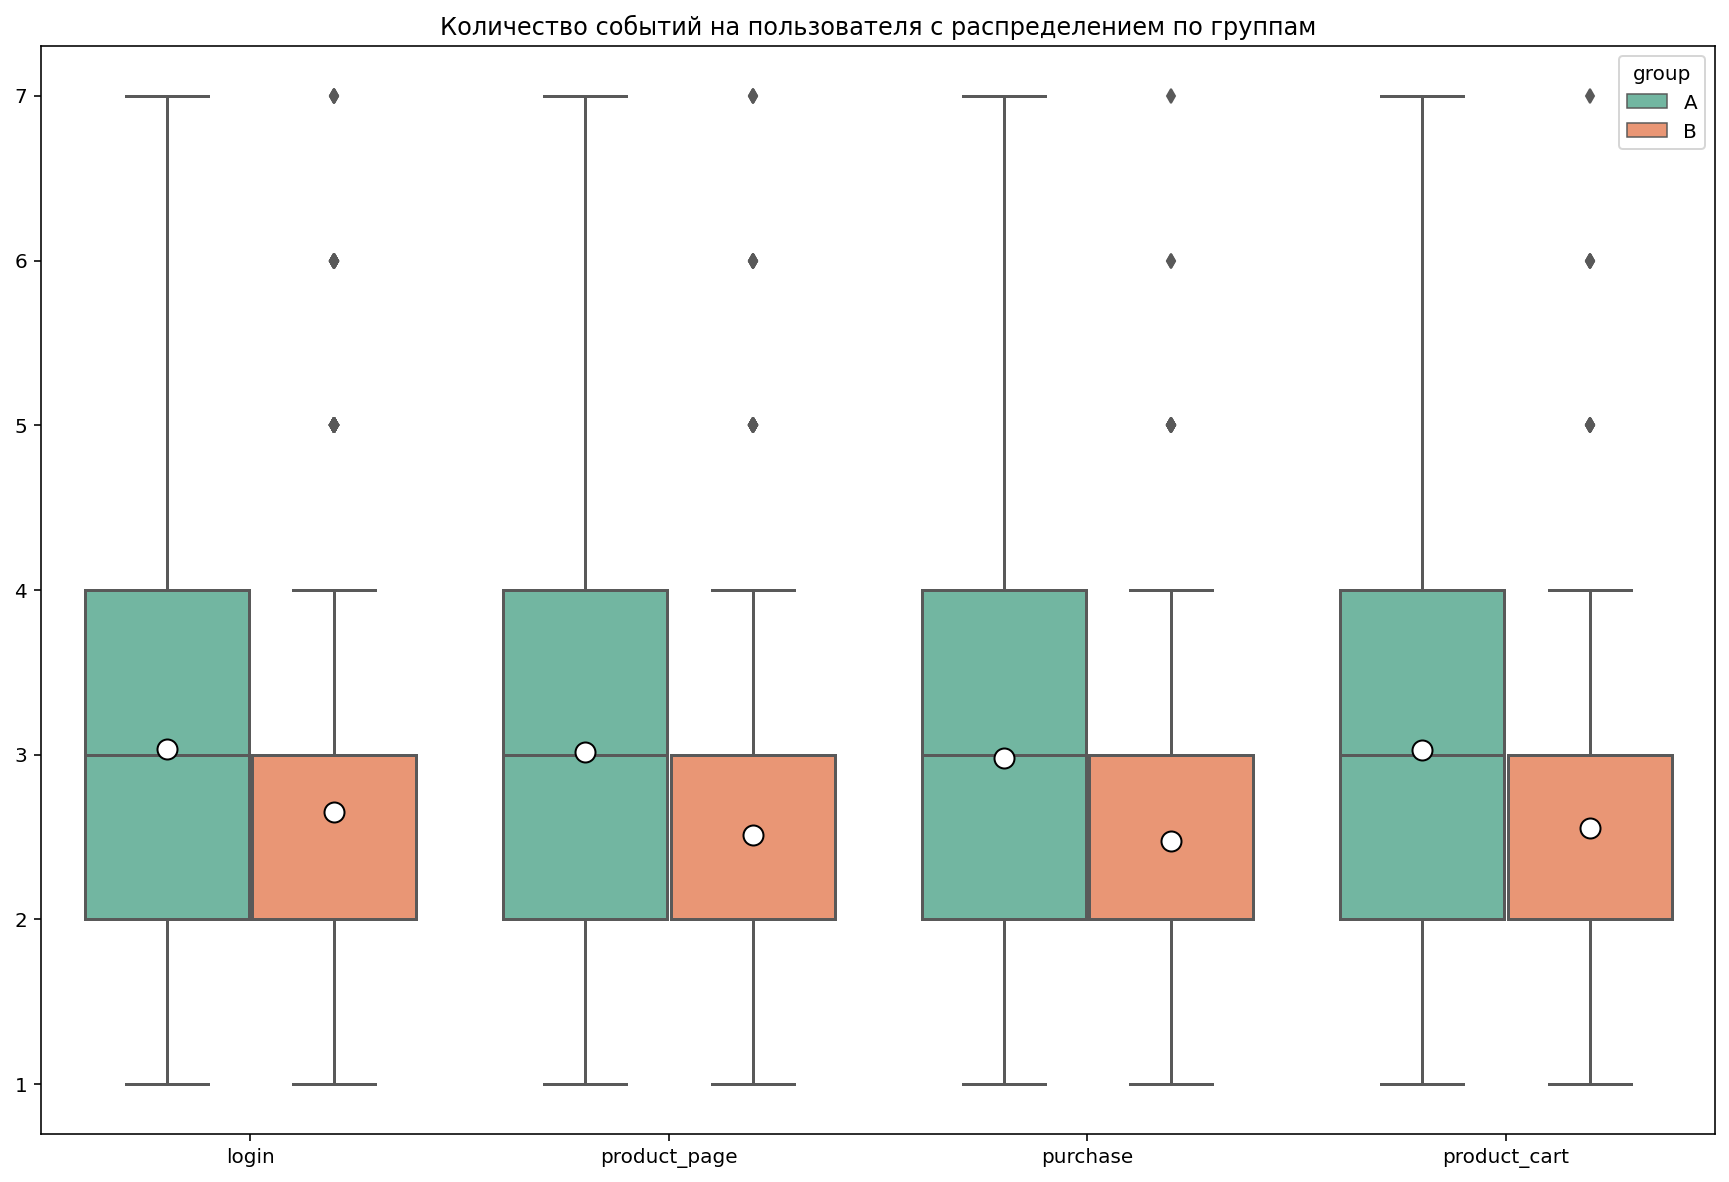

In [32]:
# построение графика «ящик с усами»
report = df.pivot_table(index=['user_id', 'group', 'event_name'],
                        values='event_dt', aggfunc='count').reset_index()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.boxplot(x='event_name', y='event_dt', data=report, palette="Set2", hue='group', hue_order=['A', 'B'], showmeans=True, meanprops={"marker": "o",
                                                                                                                                          "markerfacecolor": "white",
                                                                                                                                          "markeredgecolor": "black",
                                                                                                                                          "markersize": "10"})

plt.title('Количество событий на пользователя с распределением по группам')
plt.xlabel("")
plt.ylabel("")
plt.show()

Отметим, что в целом кол-в событий, приходящихся на пользователей группы А больше, чем на пользователей группы В.


Рассчитаем распределение количества событий на одного пользователя по группам без разбивки на этапы воронки. Сравним общие средние и медианные значения по группам.


In [33]:
report = df.pivot_table(index=['user_id', 'group'], values = 'event_name', aggfunc = ['count']).reset_index()
report.columns = ['user_id','group', 'count']
report = report.pivot_table(index='group', values = 'count', aggfunc = ['mean','median']).reset_index()
report.columns = ['group', 'mean','median']
report

group      mean  median
0     A  4.916579       4
1     B  1.757039       0


 Отметим, что среднее кол-во событий на пользователя в группе А -  порядка 5 шт., в то время как на пользователя в группе В - порядка 2 шт. Медиана в группе В равняется нулю, в А - 4 событиям. Видим, что группа А выигрывает по всем параметрам.


### Расчёт распределения числа событий в выборках по дням

Определим число событий для каждой выборки по дням.

Рассмотрим группу А.

In [34]:
report = group_A.pivot_table(
    index='event_name', columns='date', values='event_dt', aggfunc='count')
report = report.T.reset_index()
report.set_index('date', inplace=True)
report.head()

event_name  login  product_cart  product_page  purchase
date                                                   
2020-12-07    154            35            96        46
2020-12-08    159            37           108        37
2020-12-09    178            50           106        51
2020-12-10    165            45            94        46
2020-12-11    185            45           102        42

Видим, что в группе А 07/12/2020 залогинились - 154 раза, перешли на страницу с товаром - 96 раз, перешли в корзину - 35 раз, выполнили покупку - 46 раз. Возможно, что на сайте можно выполнять покупку без перехода в корзину.

Построим график.

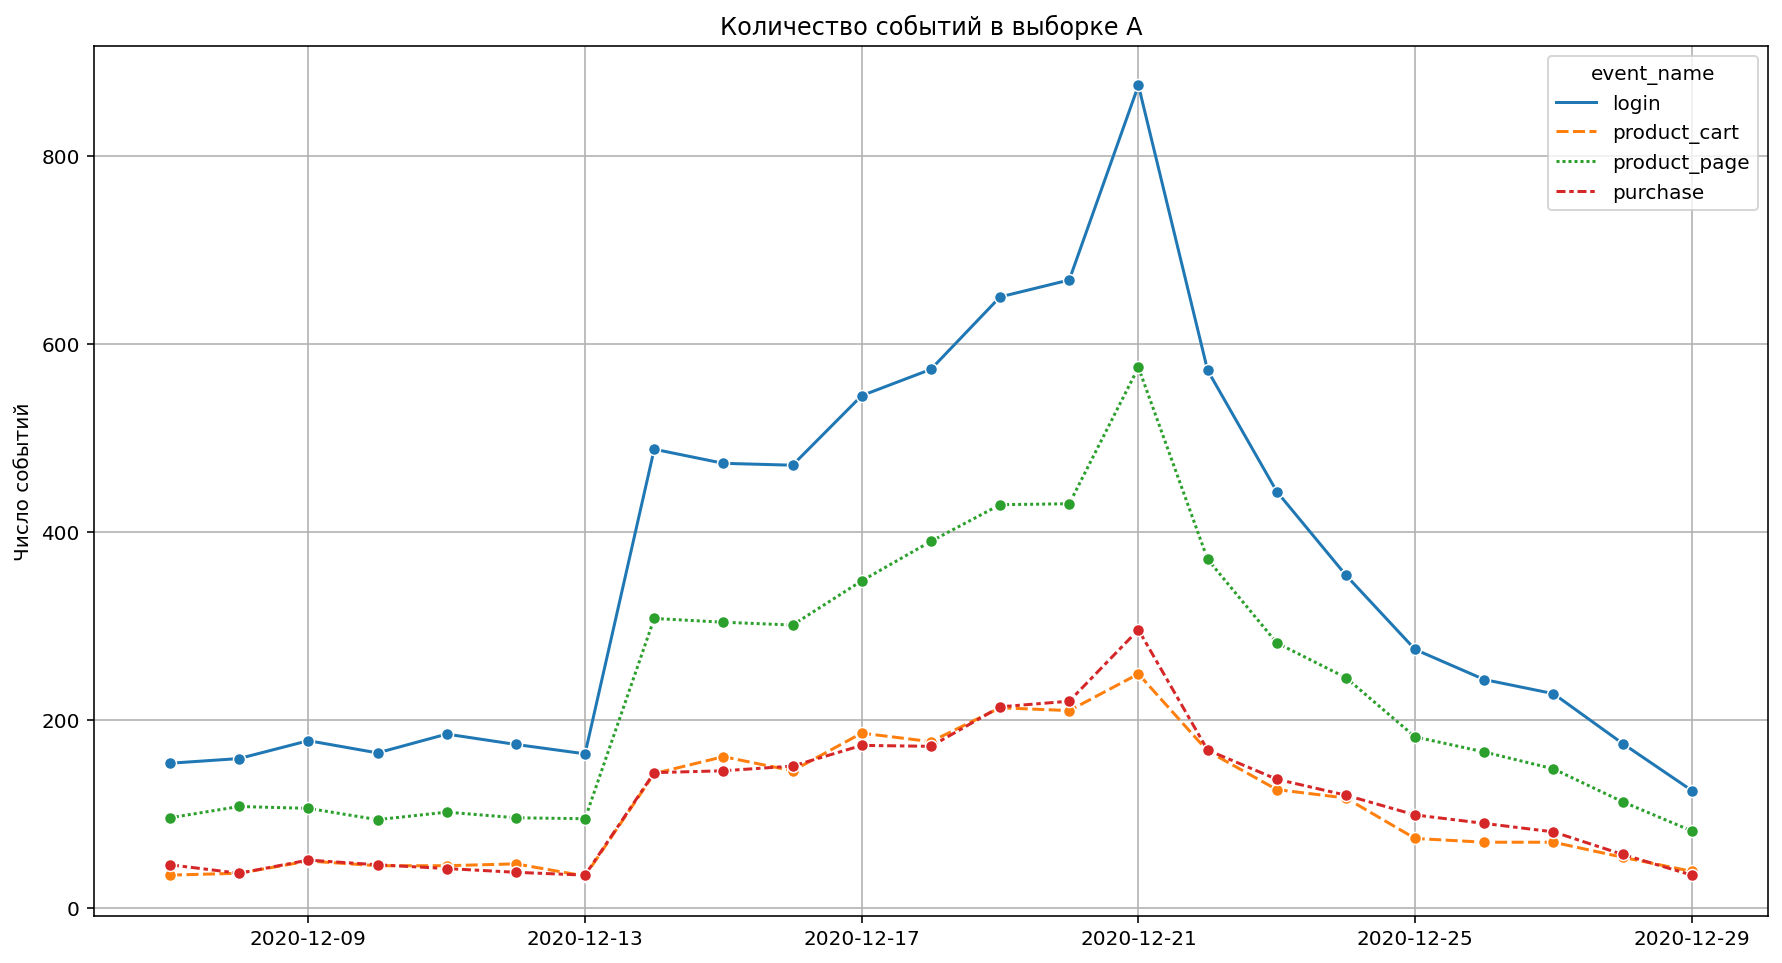

In [35]:
# построение линейного графика
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.lineplot(data=report, marker='o')
plt.title('Количество событий в выборке А')
plt.xlabel("")
plt.ylabel("Число событий")
plt.grid()
plt.show()

Заметим, что в группе А с 19/12/21 до 28/12/21 кол-во покупок превосходит переходы в корзину. Максимальное число событий произошло 21/12/2020.

Рассмотрим группу В.

In [36]:
report = group_B.pivot_table(
    index='event_name', columns='date', values='event_dt', aggfunc='count')
report = report.T.reset_index()
report.set_index('date', inplace=True)
report.head()

event_name  login  product_cart  product_page  purchase
date                                                   
2020-12-07    165            46           108        59
2020-12-08    119            34            64        35
2020-12-09    172            43           106        40
2020-12-10    131            34            72        26
2020-12-11     89            17            46        16

Видим, что в группе В 07/12/2020 залогинились - 165 раз, перешли на страницу с товаром - 108 раз, перешли в корзину - 46 раз, выполнили покупку - 59 раз. 

Построим график.

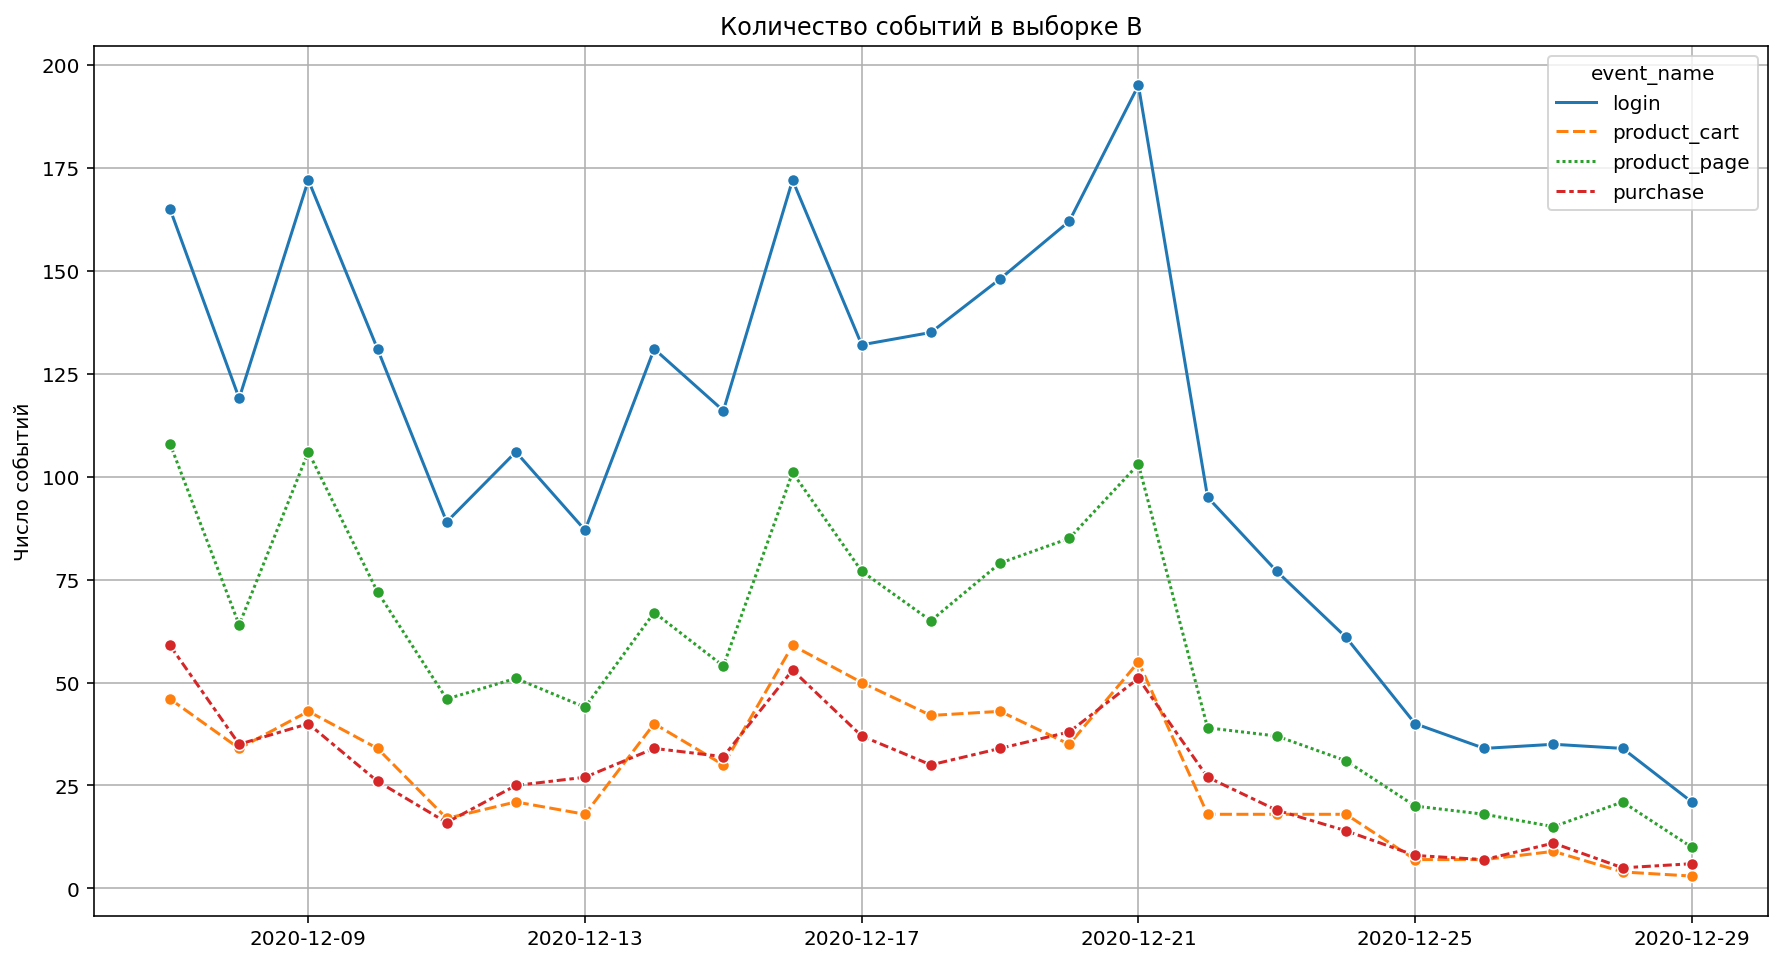

In [37]:
# построение линейного графика
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.lineplot(data=report, marker='o')
plt.title('Количество событий в выборке B')
plt.xlabel("")
plt.ylabel("Число событий")
plt.grid()
plt.show()

Заметим, что в группе B характерна периодическая смена лидера в числе событий между переходом в корзину и покупкой. Максимальное число событий произошло 21/12/2020.

Сравним события между группами на попарных графиках.

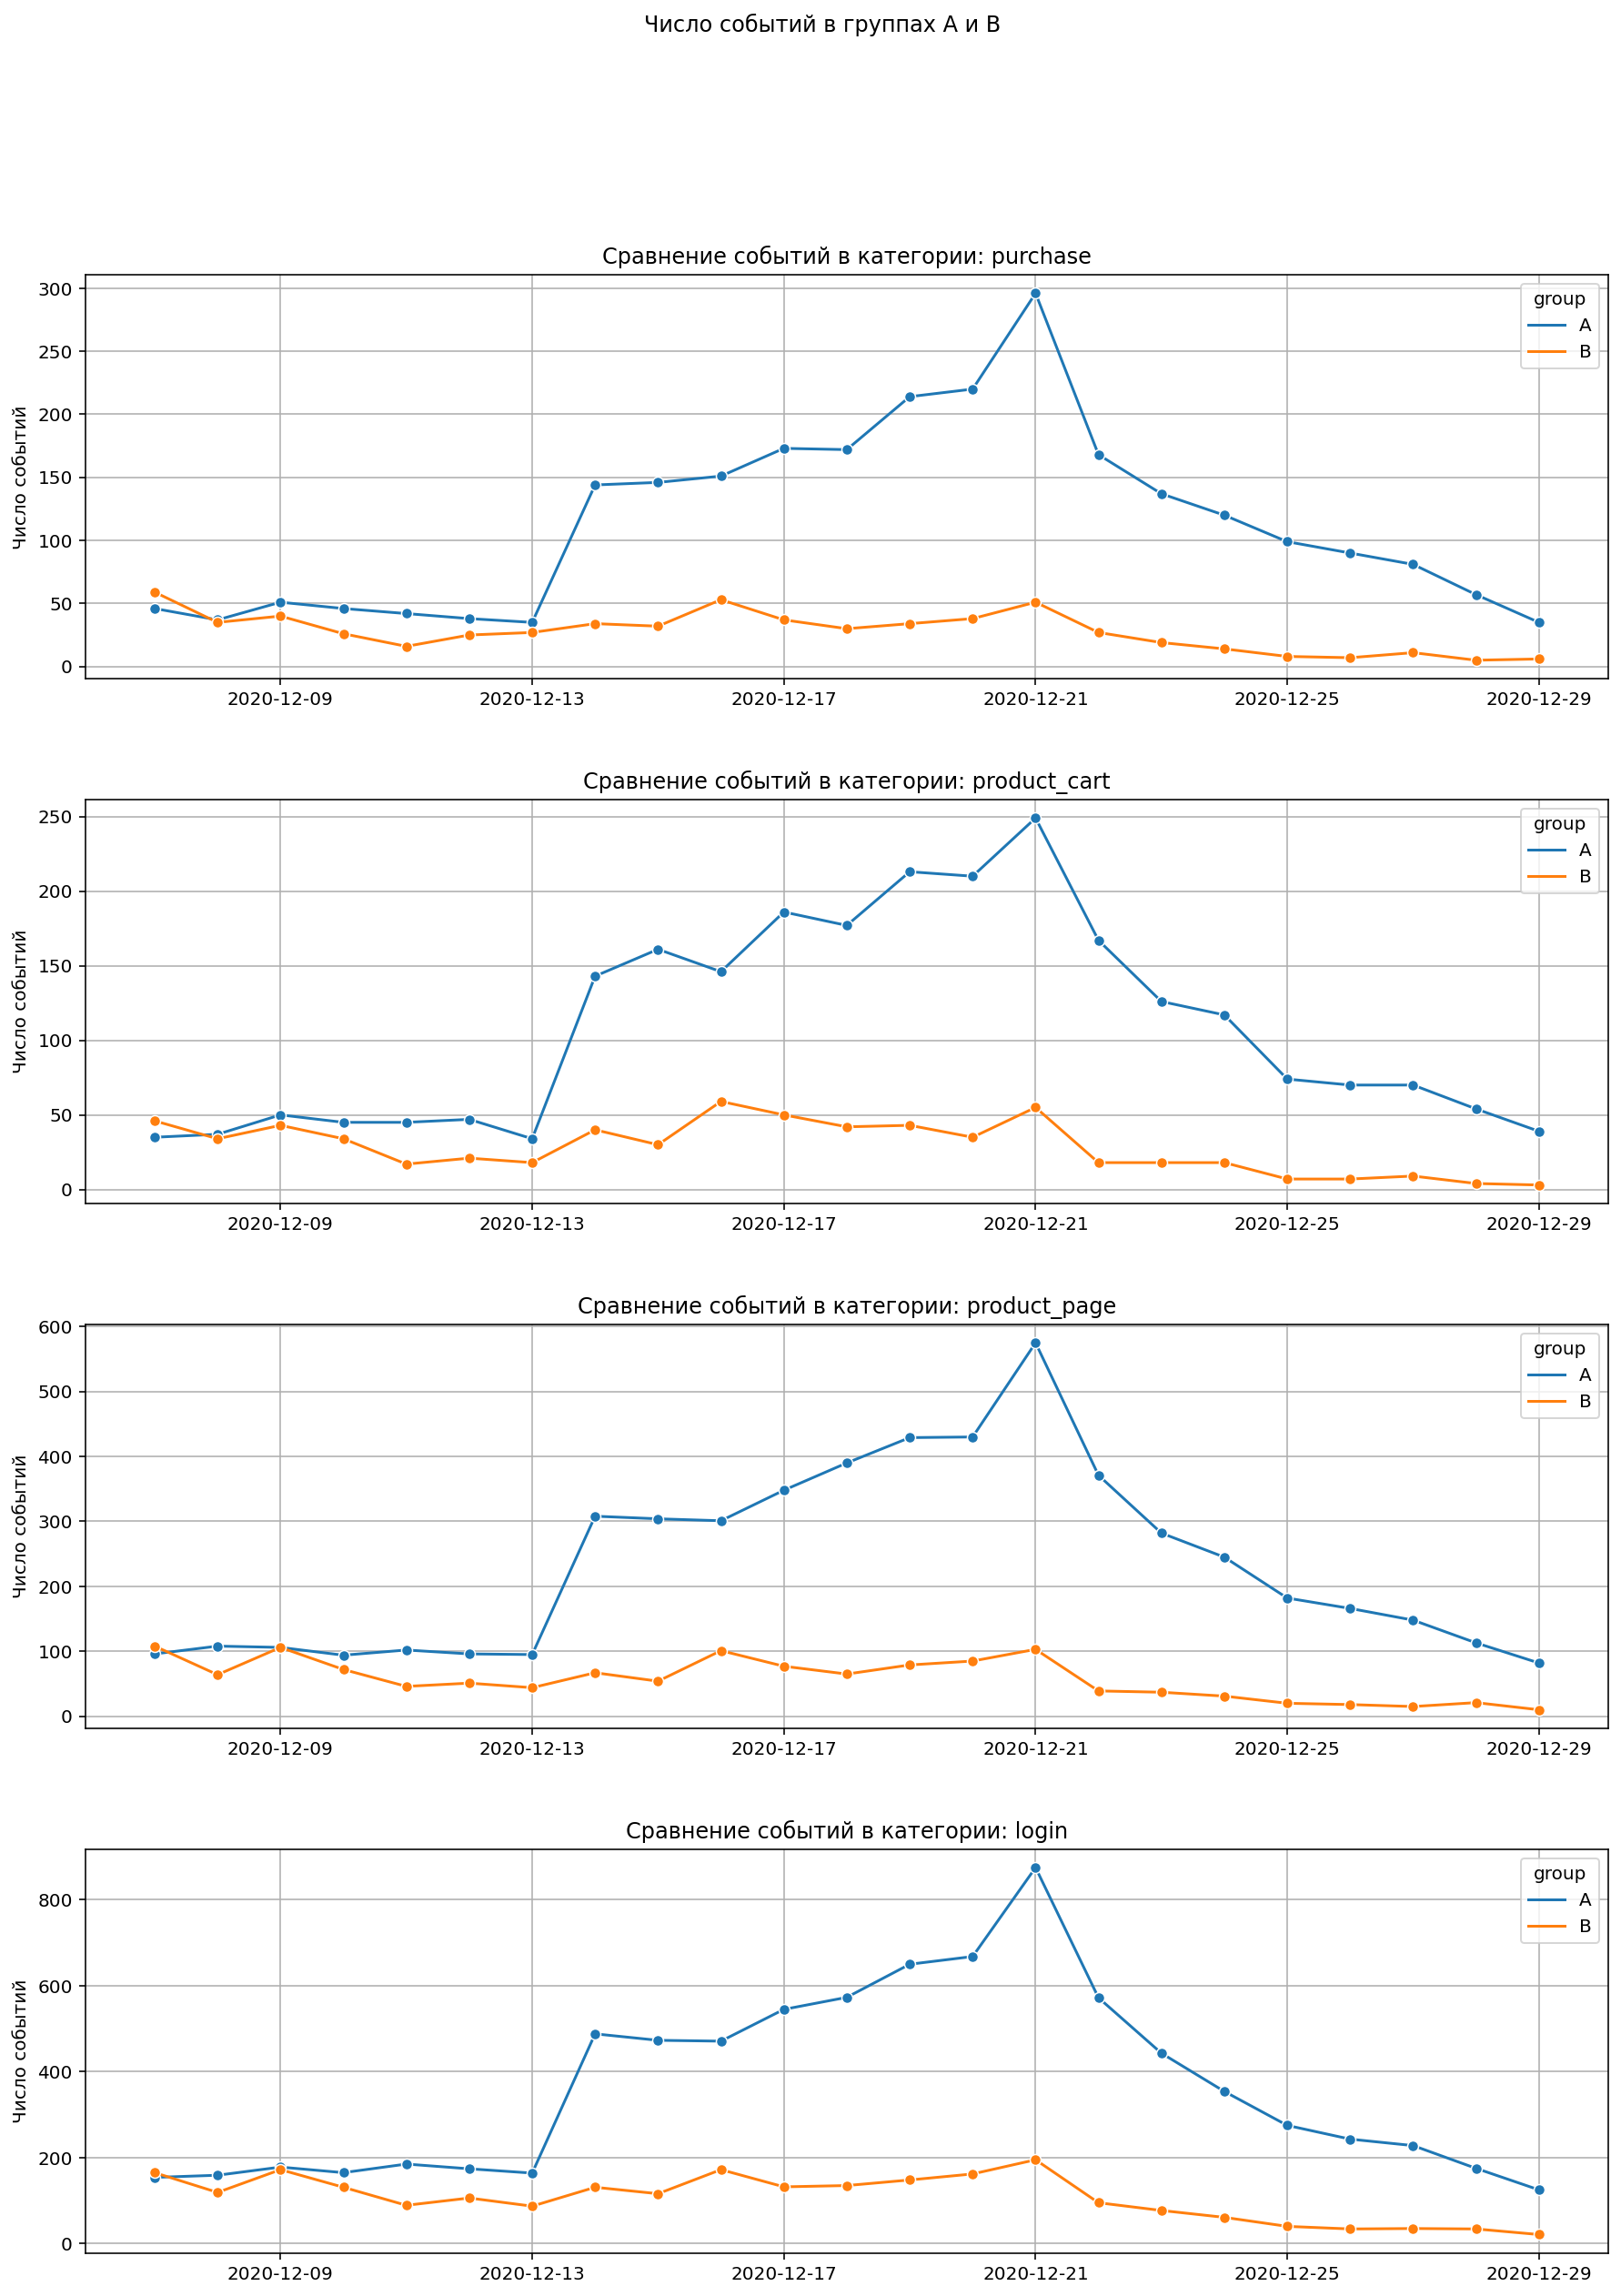

In [38]:
# построение линейных графиков
fig, ax = plt.subplots(figsize=(15, 20))
plt.suptitle("Число событий в группах А и В")
for i, event in enumerate(list(df['event_name'].unique()[:4])):
    report = df.query('event_name ==@event').groupby(
        ['date', 'group']).agg({'event_name': 'count'}).reset_index()
    plt.subplot(4, 1, i+1)
    ax = sns.lineplot(x='date', y='event_name',
                      data=report, hue='group', marker='o')
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.title(f'Сравнение событий в категории: {event}')
    plt.xlabel("")
    plt.ylabel("Число событий")
    plt.grid()

Отметим, что до 13/12/2020 наблюдается примерная схожесть в кол-ве событий. Далее число событий в группе А резко опережает группу В и растёт вверх, достигая максимального значения 21/12/2020. Для событий группы B можно выделить три характерных всплеска, которые произошли 09/12/2020, 16/12/2020 и 21/12/2020.


 Найдем общее распределение событий по дням с разделением по группам и без разбивки по этапам воронки. Построим график.


In [39]:
report = df.pivot_table(index=[ 'group','date'], values = 'event_name', aggfunc = ['count']).reset_index()
report.columns = ['group', 'date','count']
report.head()

group        date  count
0     A  2020-12-07    331
1     A  2020-12-08    341
2     A  2020-12-09    385
3     A  2020-12-10    350
4     A  2020-12-11    374

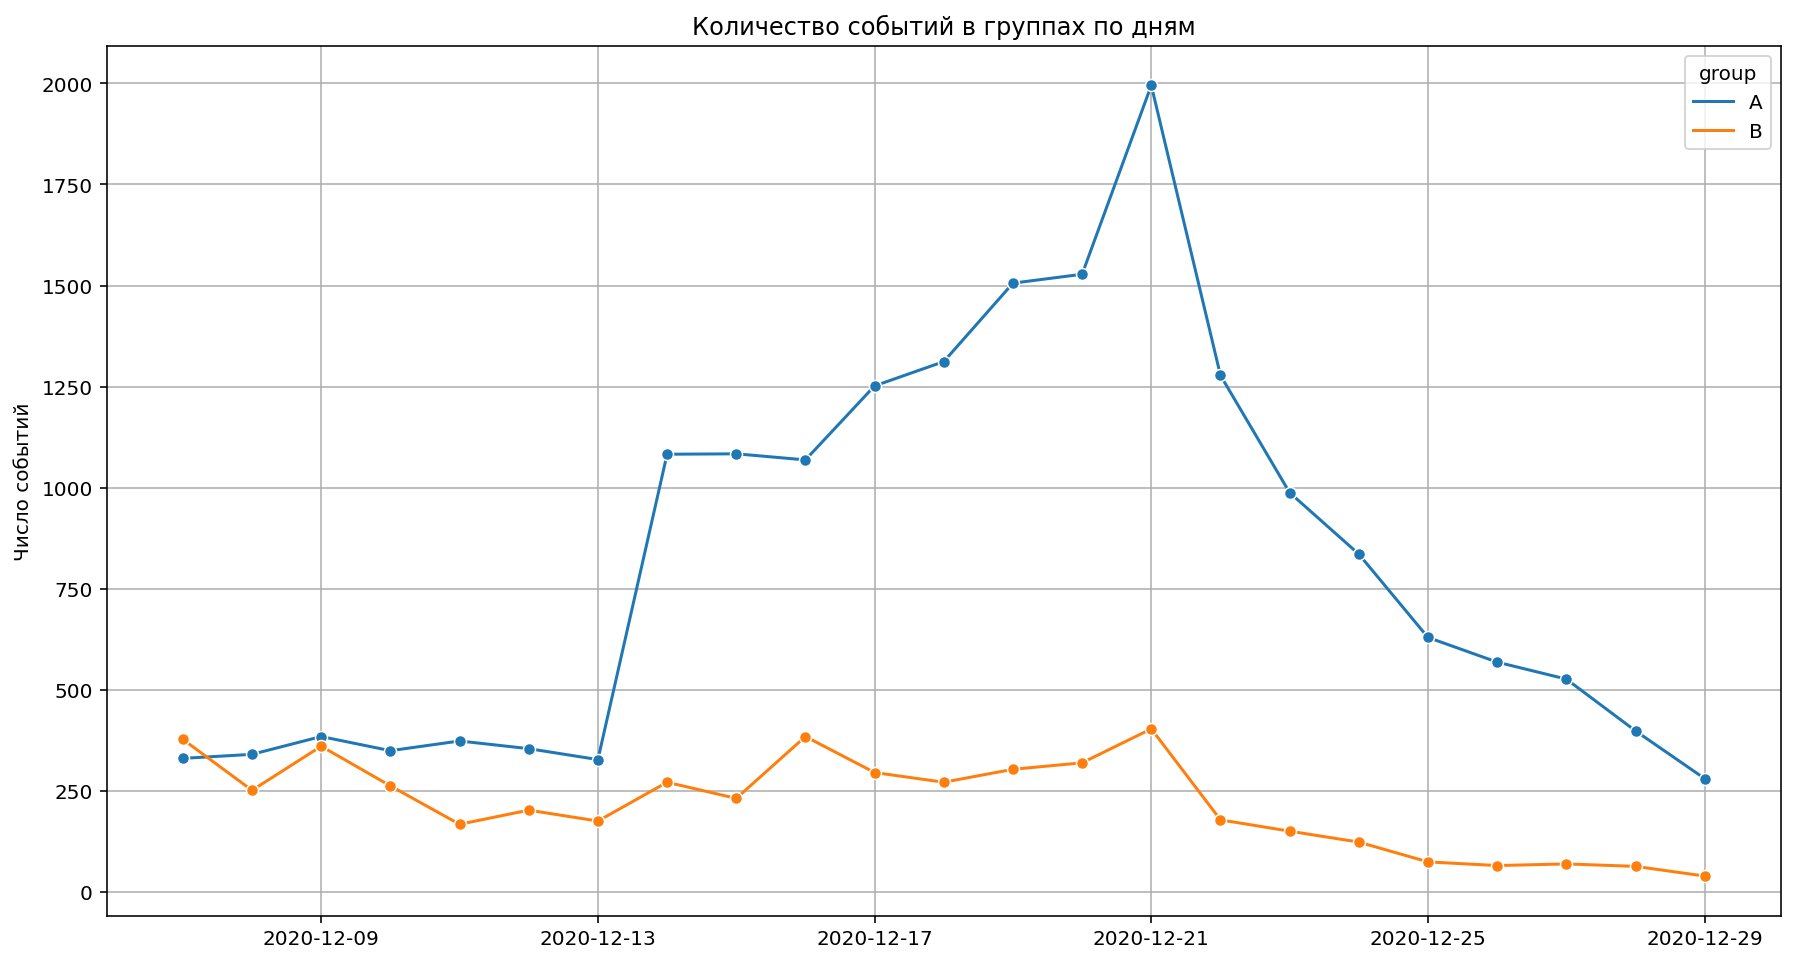

In [40]:
## построение линейного графика
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.lineplot(data=report, x = 'date', y = 'count', hue='group',marker='o')
plt.title('Количество событий в группах по дням')
plt.xlabel("")
plt.ylabel("Число событий")
plt.grid()
plt.show()


 Видим, что кол-во событий в группах до 13/12/2020 примерно схожее, затем группа А вырывается вверх и достигает максимума в 2000 событий 21/12/2020.


### Определение изменения конверсии в воронке в выборках на разных этапах

Посмотрим на общее распределение событий в процентах.

In [41]:
df['event_name'].value_counts(normalize=True) * 100

login           45.246479
product_page    28.018109
purchase        13.547954
product_cart    13.187458
Name: event_name, dtype: float64

Можно предположить, что воронка событий выглядит следующим образом:

login — product_page — product_cart — purchase  

(регистрация — страница с товаром — корзина — платёж).

Подсчитаем кол-во уникальных пользователей для группы А на каждом шаге воронки событий.

In [42]:
# подсчет кол-во уникальных пользователей
report = group_A.groupby('event_name').agg({'user_id': 'nunique'}).sort_values(
    by='user_id', ascending=False)

report

user_id
event_name           
login            2747
product_page     1780
purchase          872
product_cart      824

Видим, что кол-во уникальных пользователей на этапе покупки превышает кол-во на этапе корзины.

Поменяем этапы покупки и корзины местами в соответствии с порядком утвержденным ранее и построим график воронки событий.

In [43]:
# замена этапов
report = report.drop(labels='purchase', axis=0)
new_row = pd.Series(data={'user_id': 872}, name='purchase')
report = report.append(new_row)
report

user_id
event_name           
login            2747
product_page     1780
product_cart      824
purchase          872

In [44]:
# построение графика воронки

fig = go.Figure(
    go.Funnel(
        y=[
            'Регистрация',
            'Страница с товаром',
            'Корзина',
            'Платёж',
        ],
        x=report['user_id'],
    )
)
fig.update_layout(title="Воронка событий")
fig.show()

Рассчитаем общую конверсию и конверсию в шаг для группы А.

In [45]:
# расчет общей конверсии в процентах
report2 = round(report / report.loc['login'] * 100)
report2

user_id
event_name           
login           100.0
product_page     65.0
product_cart     30.0
purchase         32.0

Таким образом, для группы А 32% пользователей доходят до этапа покупки, что достаточно хорошо.

In [46]:
# расчет  конверсии в шаг в процентах
report2 = round(report / report.shift(1) * 100)
report2.loc['login'] = 100
report2

user_id
event_name           
login           100.0
product_page     65.0
product_cart     46.0
purchase        106.0

Странный показатель события покупки в 106% свидетельствует, что большая часть пользователей миновала корзину и перешла к покупке напрямую. Необходимо уточнить у ответственных коллег с чем связано подобное событие.

Подсчитаем кол-во уникальных пользователей для группы В на каждом шаге воронки событий.

In [47]:
# подсчет кол-во уникальных пользователей
report3 = group_B.groupby('event_name').agg({'user_id': 'nunique'}).sort_values(
    by='user_id', ascending=False)

report3

user_id
event_name           
login             927
product_page      523
purchase          256
product_cart      255

Видим, что кол-во уникальных пользователей на этапе покупки превышает кол-во на этапе корзины.

Поменяем этапы покупки и корзины местами в соответствии с порядком утвержденным ранее и построим график воронки событий.

In [48]:
# замена этапов
report3 = report3.drop(labels='purchase', axis=0)
new_row = pd.Series(data={'user_id': 256}, name='purchase')
report3 = report3.append(new_row)
report3

user_id
event_name           
login             927
product_page      523
product_cart      255
purchase          256

In [49]:
# построение графика воронки
fig = go.Figure(
    go.Funnel(
        y=[
            'Регистрация',
            'Страница с товаром',
            'Корзина',
            'Платёж',
        ],
        x=report3['user_id'],
    )
)
fig.update_layout(title="Воронка событий")
fig.show()

Рассчитаем общую конверсию и конверсию в шаг для группы B.

In [50]:
# расчет общей конверсии в процентах
report4 = round(report3 / report3.loc['login'] * 100)
report4

user_id
event_name           
login           100.0
product_page     56.0
product_cart     28.0
purchase         28.0

Таким образом, для группы B 28% пользователей доходят до этапа покупки, что достаточно хорошо.

In [51]:
# расчет  конверсии в шаг в процентах
report4 = round(report3 / report3.shift(1) * 100)
report4.loc['login'] = 100
report4

user_id
event_name           
login           100.0
product_page     56.0
product_cart     49.0
purchase        100.0

Наблюдаем ту же странную ситуацию с конверсией в покупку в 100%, что и в группе А.

Согласно ТЗ:

-ожидаемый эффект: за 14 дней с момента регистрации пользователи покажут улучшение каждой метрики не менее, чем на 10%:

   - конверсии в просмотр карточек товаров — событие `product_page`,
   - просмотры корзины — `product_cart`,
   - покупки — `purchase`.
   
   
Проверим данный момент, используя следующую формулу: (конверсия_В / конверсия_А) - 1. И тем самым определим относительную разницу конверсии в группе В к таковой в группе А.

In [52]:
report = (report4/report2)-1
report

user_id
event_name            
login         0.000000
product_page -0.138462
product_cart  0.065217
purchase     -0.056604

Итак, мы обнаружили, что в ходе эксперимента не удалось добиться ожидаемого эффекта в 10%. Конверсия в группе А была лучше на всех этапах, за исключением product_cart - разница в 7%.

Распространённая проблемой A/B-тестов является некорректное деление трафика теста. Возможно, именно поэтому нам не удалось добиться желаемого эффекта.




Прежде, чем приступать к A/B-тестированию необходимо учесть следующие особенности данных:
    
    
- какие пользователи участвуют — новые, старые, все, какой-то конкретный сегмент и т.п.;
- как разбиваем на группы;
- объем выборки;
- продолжительность тестирования;
- допустимый уровень значимости.
    
    
    


### Вывод 



    
    
Мы определили, что кол-во событий на пользователя в группе А превышает кол-во в группе В.
    
    

Затем, мы выяснили что до 13/12/2020 наблюдается примерная схожесть в кол-ве событий по группам. Далее число событий в группе А резко опережает группу В и растёт вверх, достигая максимального значения 21/12/2020. Для событий группы B можно выделить три характерных всплеска, которые произошли 09/12/2020, 16/12/2020 и 21/12/2020.
    
    
    
Отметили, что среднее кол-во событий на пользователя в группе А -  порядка 5 шт., в то время как на пользователя в группе В - порядка 2 шт. Медиана в группе В равняется нулю, в А - 4 событиям. Видим, что группа А выигрывает по всем параметрам.
    
    
    
    
Нашли, что кол-во событий в группах до 13/12/2020 примерно схожее, затем группа А вырывается вверх и достигает максимума в 2000 событий 21/12/2020.
    
    

Далее, мы рассчитали общую конверсию и конверсию в шаг для групп А и B и обнаружили, что конверсия в группе А была лучше на всех этапах, за исключением product_cart - разница в 7%.
    
    

В целом, нам не удалось добиться ожидаемого эффекта улучшения каждой метрики в 10%.
    
    

Перейдем к анализу A/B-теста.
    
    


## Анализ А/В - теста

Создадим общую таблицу с уникальными пользователями на каждом шагу с разделением на группы А и В. Затем перейдем к проведению статического теста, который позволит определить разницу между выборками.

In [53]:
report = df.pivot_table(index='event_name', columns='group', values='user_id',
                        aggfunc='nunique').sort_values(by='A', ascending=False)

# меняем "корзину с покупкой" местами
report = report.drop(labels='purchase', axis=0)
new_row = pd.Series(data={'A': 872, 'B': 256}, name='purchase')
filtered_df = df[df['event_name'].notnull()]

users_number_row = filtered_df.groupby('group')['user_id'].nunique()
report = report.append(new_row)
report = report.append(users_number_row).reset_index()

report

event_name     A    B
0         login  2747  927
1  product_page  1780  523
2  product_cart   824  255
3      purchase   872  256
4       user_id  2747  928

 Итак, мы создали общий датафрейм с кол-вом уникальных пользователей на каждом шаге.
    
Перед проведением статического теста сформулируем нулевую и альтернативную гипотезы.


Нулевая гипотеза H0: конверсии пользователей одинаковые.

Альтернативная гипотеза H1: конверсии пользователей разные.
    
        
Напишем функции `z_test` и `groups_compare` с фиксированным значением параметра  `trials`. Осуществим её вызов.


In [54]:
def z_test(successes, trials):

    alpha = .01  # критический уровень статистической значимости

    # пропорция успехов в первой группе:
    p1 = successes[0]/trials[0]

    # пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

    # разница пропорций в датасетах
    difference = p1 - p2

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(
        p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1])
    )

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        )

In [55]:
# создание функции groups_compare
def groups_compare(data, lst):
    for i in range(len(data) - 1):
        
        successes = data.loc[i,lst].values 
        trials = data.loc[4, lst].values
                
        print(f"Событие: {data.loc[i,'event_name']}")

        z_test(successes, trials)

In [56]:
# вызов функции
groups_compare(report, ['A', 'B'])

Событие: login
p-значение:  0.08529860212027773
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: product_page
p-значение:  4.310980554755872e-06
Отвергаем нулевую гипотезу: между долями есть значимая разница
Событие: product_cart
p-значение:  0.14534814557238196
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: purchase
p-значение:  0.017592402663314743
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



 Таким образом, между долями на странице с товаром у нас есть значимая разница. Между остальными событиями не получилось отвергнуть нулевую гипотезу. 


## Общий вывод


    
    
    
Целью исследования  было провести оценку результатов A/B-теста.

**В рамках оценки корректности проведения теста, мы пришли к следующим результатам:**

-проверили соответствие данных требованиям технического задания:

  - убрали пользователей, которые зарегистрировались после 21/12/2020;
  
  
  - оставили только актуальные события до 29/12/2020 включительно;
  
  
  - проверили, что аудитория: 15% новых пользователей из региона EU;
  
  
  - оценили, что ожидаемое количество участников теста: более 6000.
  
  
-определили, что время проведения теста совпадает с двумя маркетинговыми событиями и приняли решение сохранить мощность теста.

-рассчитали, что 1602 пользователся приняли участие в двух тестах: `interface_eu_test и recommender_system_test`, и пришли к выводы, что если тесты проводились в одно время, то это могло повлиять на результирующие метрики.


-выяснили, что  у нас нет пользователей, которые попали в  контрольную и экспериментальную группы одновременно;
    

-удалили события за пределами 14-дневного периода после регистрации.



**В ходе исследовательского анализа данных мы выяснили, что:**


- кол-во событий на пользователя в группе А превышает кол-во в группе В.


- до 13/12/2020 наблюдается примерная схожесть в кол-ве событий по группам. Далее число событий в группе А резко опережает группу В и растёт вверх, достигая максимального значения 21/12/2020. Для событий группы B можно выделить три характерных всплеска, которые произошли 09/12/2020, 16/12/2020 и 21/12/2020.


- конверсия в группе А была лучше на всех этапах, за исключением product_cart - разница в 7%.


- не удалось добиться ожидаемого эффекта улучшения каждой метрики в 10%;
    
    
    
- среднее кол-во событий на пользователя в группе А -  порядка 5 шт., в то время как на пользователя в группе В - порядка 2 шт. Медиана в группе В равняется нулю, в А - 4 событиям. Видим, что группа А выигрывает по всем параметрам;  
    
    

- кол-во событий в группах до 13/12/2020 примерно схожее, затем группа А вырывается вверх и достигает максимума в 2000 событий 21/12/2020.
    




**При анализе  А/В-теста:**

-  определили , что между долями на странице с товаром у нас есть значимая разница. Между остальными событиями не получилось отвергнуть нулевую гипотезу.



- тест необходимо остановить и признать провальным.


**Мы можем дать следующие рекомендации:**

-  уделить пристальное внимание делению пользователей на контрольную и экспериментальную группу в равных долях;



-  исключить пересечения пользователей с другими А/B-тестами;



-  не проводить тестирование в период промоакций и распродаж;



-  осуществить решение проблемы с воронкой событий.

    

